In [93]:
import pandas as pd
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [94]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
from pyspark.sql import SparkSession
from datetime import date

#create API connection and authenticate
api = KaggleApi()
api.authenticate()

#download dataset 
api.dataset_download_file('deepcontractor/monkeypox-dataset-daily-updated','Daily_Country_Wise_Confirmed_Cases.csv')

#create spark session
# spark = SparkSession.builder.getOrCreate()

#create spark df
daily_df = spark.read.csv('Daily_Country_Wise_Confirmed_Cases.csv', header=True)

def date_check():
    today = date.today()
    return str(today)

def column_grab():
    try:
        return daily_df.select(daily_df[date_check()]).show()
    except:
        pass

column_grab()

In [121]:
# DATA CLEANING
from pyspark.sql.types import IntegerType

daily_df = spark.read.csv("../data/Daily_Country_Wise_Confirmed_Cases.csv", header=True)
worldwide_df = spark.read.csv("../data/Monkey_Pox_Cases_Worldwide.csv", header=True)
timeline_df = spark.read.csv("../data/Worldwide_Case_Detection_Timeline.csv", header=True)
# daily_df.show(10)
# daily_df.describe()
print(f"# of columns: {len(daily_df.columns)}")
worldwide_df.columns
worldwide_df.show(2)
worldwide_df = worldwide_df.withColumns({"Confirmed_Cases": worldwide_df["Confirmed_Cases"].cast(IntegerType()), "Suspected_Cases": worldwide_df["Suspected_Cases"].cast(IntegerType()), "Hospitalized": worldwide_df["Hospitalized"].cast(IntegerType()), "Travel_History_Yes": worldwide_df["Travel_History_Yes"].cast(IntegerType()), "Travel_History_No": worldwide_df["Travel_History_No"].cast(IntegerType())})
worldwide_df.show(2)
# timeline_df = timeline_df.fillna({"Age": "unknown", "Gender": "unknown", "Symptoms": "unknown", "Hospitalised (Y/N/NA)": "NA", "Isolated (Y/N/NA)": "NA", "Travel_History (Y/N/NA)": "NA"})
# timeline_df.show(30)

# of columns: 48
+--------+---------------+---------------+------------+------------------+-----------------+
| Country|Confirmed_Cases|Suspected_Cases|Hospitalized|Travel_History_Yes|Travel_History_No|
+--------+---------------+---------------+------------+------------------+-----------------+
| England|         1035.0|            0.0|         5.0|               2.0|              7.0|
|Portugal|          402.0|            0.0|         0.0|               0.0|             34.0|
+--------+---------------+---------------+------------+------------------+-----------------+
only showing top 2 rows

+--------+---------------+---------------+------------+------------------+-----------------+
| Country|Confirmed_Cases|Suspected_Cases|Hospitalized|Travel_History_Yes|Travel_History_No|
+--------+---------------+---------------+------------+------------------+-----------------+
| England|           1035|              0|           5|                 2|                7|
|Portugal|            402|  

In [97]:


daily_df2 = daily_df.withColumn("2022-07-05", (daily_df["2022-06-30"] + 10).cast(IntegerType()))
daily_df2.select("country", "2022-06-30").show(6)
new_col = daily_df2.select("2022-07-05")

# daily_df.columns
# daily_df2.columns
new_col.show(6)

+-------------+----------+
|      country|2022-06-30|
+-------------+----------+
|      England|         0|
|     Portugal|        11|
|        Spain|         0|
|United States|         0|
|      Germany|        95|
|      Belgium|         0|
+-------------+----------+
only showing top 6 rows

+----------+
|2022-07-05|
+----------+
|        10|
|        21|
|        10|
|        10|
|       105|
|        10|
+----------+
only showing top 6 rows



['England', 'Germany', 'Spain', 'France', 'Portugal']
[1035, 969, 800, 440, 402]


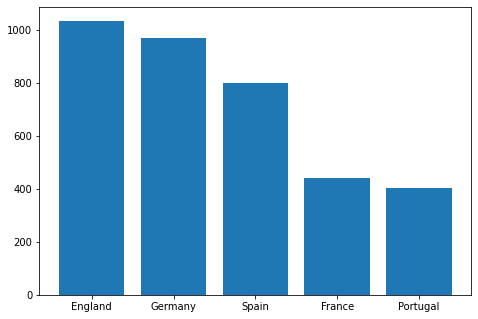

In [160]:
# Data Visualizations
from matplotlib import pyplot as plt

# worldwide_df.select("Country", "Confirmed_Cases").show(10)
worldwide_df.createOrReplaceTempView("worldwide_cases")
top5countries = spark.sql("SELECT Country FROM worldwide_cases ORDER BY Confirmed_Cases DESC LIMIT 5")
top5countries_cases = spark.sql("SELECT Confirmed_Cases FROM worldwide_cases ORDER BY Confirmed_Cases DESC LIMIT 5")
# top5countries.show()
# top5countries_cases.show()
# top5countries.collect()
# top5countries_cases.collect()
top5countries = top5countries.collect()
top5countries_cases = top5countries_cases.collect()
# print(top5countries)
# print(top5countries_cases)

top_countries_list = []
for row in top5countries:
    for country in row:
        top_countries_list.append(country)
print(top_countries_list)

top_cases_list = []
for row in top5countries_cases:
    for case in row:
        top_cases_list.append(case)
print(top_cases_list)

# graph of the 5 countries with highest monkey pox cases 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(top_countries_list, top_cases_list)
plt.show()

['2022-05-06', '2022-05-12', '2022-05-13', '2022-05-15', '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04', '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-11', '2022-06-12', '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30']
['1', '1', '1', '4', '0', '2', '0', '11', '0', '36', '14', '7', '24', '0', '0', '0', '71', '11', '5', '11', '15', '0', '73', '18', '0', '43', '0', '0', '104', '0', '52', '0', '46', '0', '0', '0', '216', '0', '0', '0', '107', '0', '162', '0', '0', '0', '0']


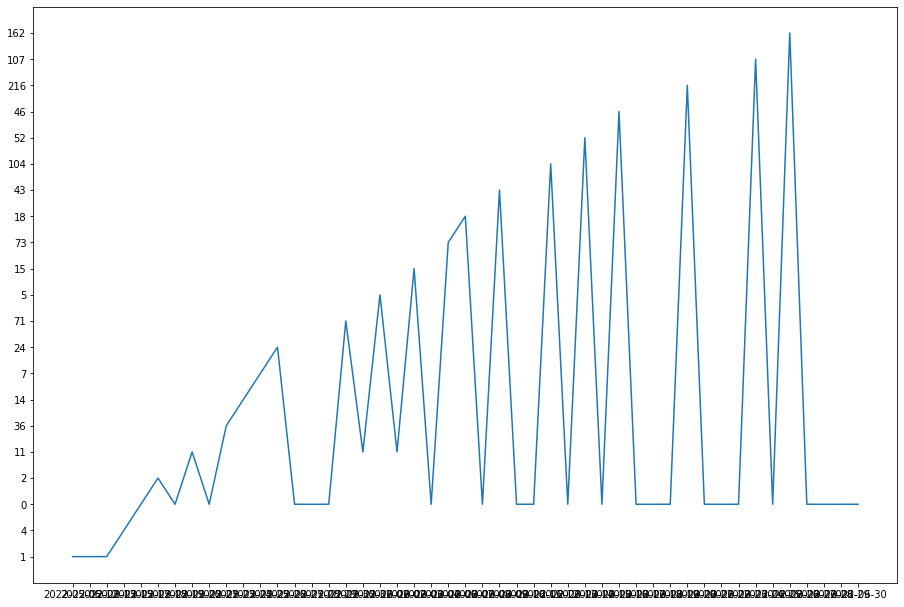

In [168]:
daily_df.columns
daily_df.createOrReplaceTempView("daily_cases")
england_df = spark.sql("SELECT * FROM daily_cases WHERE Country LIKE 'England' ")
# print(england_df.show())
# england_df_cases = spark.sql("SELECT ")
# england_df.show()
# print(england_df.columns)
england_df_dates = []
for day in england_df.columns:
    if day != "Country":
        england_df_dates.append(day)
print(england_df_dates)

# cases = england_df.collect()
daily_case_count = []
for row in england_df.collect():
    for case in row:
        if case != "England":
            daily_case_count.append(case)
print(daily_case_count)
# daily_df.filter(daily_df.Country == "England").collect()

# Time Series
# ax5 = plt.subplot2grid((2,4), (1,0), colspan=2) 
# dates = pd.date_range(england_df_dates[0], england_df_dates[6])
# ax5.plot(dates, xx + np.random.randn(len(xx)))
# ax5.set_xticks(dates[::30])
# ax5.set_xticklabels(dates.strftime('%Y-%m-%d')[::30])
# ax5.set_title("Time Series")

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.plot(england_df_dates, daily_case_count)
plt.show()
# plt.plot(england_df_dates[0:6], daily_case_count[0:6], linewidth=2)